# ENEL 682: Assignment 1-2

Using the heart-attack.csv example found in Visualization Examples on D2L, fill in the blanks for a new dataset, auto-mpg

The first step is to download the auto-mpg data set (auto-mpg.data and auto-mpg.names) from UCI: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

From the Visualization Examples file, replace gender with origin and age with mpg

Rename this file assign1-visualization-auto_mpg.ipynb and submit the Google Colab link to D2L

# New Section

In [ ]:
%matplotlib inline

# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Plotting with pandas

In [ ]:
# Load auto-mpg.data
# Hint: Use attribute information from website to determine column names
# Hint: Load with na_values = '?' and sep=r'\s+'

data = pd.read_csv('auto-mpg.data',na_values='?',sep=r'\s+')
df=pd.DataFrame(data)

df.columns=['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration','modelyear','origin','carname']

print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    15.0          8         350.0       165.0  3693.0          11.5   
1    18.0          8         318.0       150.0  3436.0          11.0   
2    16.0          8         304.0       150.0  3433.0          12.0   
3    17.0          8         302.0       140.0  3449.0          10.5   
4    15.0          8         429.0       198.0  4341.0          10.0   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         140.0        86.0  2790.0          15.6   
393  44.0          4          97.0        52.0  2130.0          24.6   
394  32.0          4         135.0        84.0  2295.0          11.6   
395  28.0          4         120.0        79.0  2625.0          18.6   
396  31.0          4         119.0        82.0  2720.0          19.4   

     modelyear  origin             carname  
0           70       1   buick skylark 320  
1           70       1  plymouth satellite  


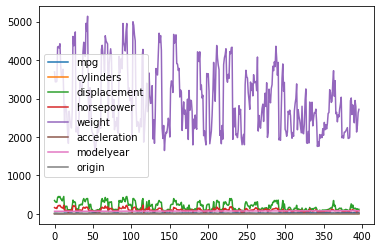

In [ ]:
# Plot all the columns
df.plot()

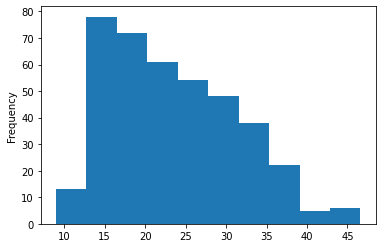

In [ ]:
# Plot a histogram by mpg
df['mpg'].plot.hist();

How many cars from each origin do we have?

In [ ]:
# Find number of cars from each origin
df.origin.value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

Do we have similar ages in females and males?  
Plotting two histograms for each gender side beside directly form the dataframe:

Do we have similar mpgs in cars from different origins?
Plotting three histograms for each origin directly from the dataframe:

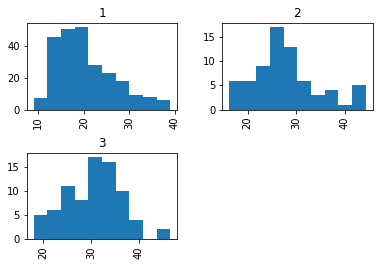

In [ ]:
# Plot histograms here
axs = df.hist(column='mpg', by='origin').flatten()

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

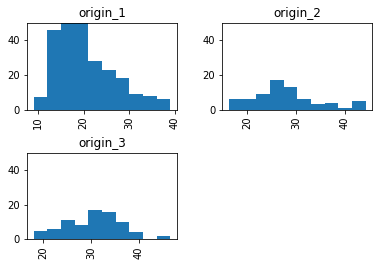

In [ ]:
# Plot formatted plot here
axs = df.hist(column='mpg', by='origin').flatten()
axs[0].set(title='origin_1', ylim=[0, 50])
axs[1].set(title='origin_2', ylim=[0, 50]);
axs[2].set(title='origin_3', ylim=[0, 50]);

Is mpg and weight correlated? Maybe it is different for origins?  
Let's have a look with a scatter plot.

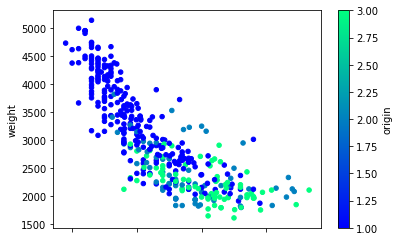

In [ ]:
# Plot scatter plot here
df.plot.scatter('mpg', 'weight', c='origin', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

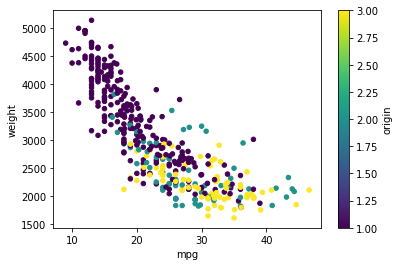

In [ ]:
# Plot scatter plot with x-labels here
fig, ax = plt.subplots()
df.plot.scatter('mpg', 'weight', c='origin', colormap='viridis', ax=ax);

It is a bit annoying that there is a colorbar, we know gender is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

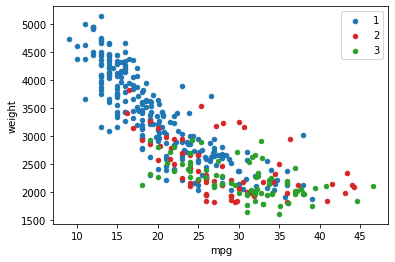

In [ ]:
# Plot scatter plot with specified colors here
colors = {1: 'tab:blue', 2: 'tab:red' , 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'weight', c=colors[key], label=key, ax=ax);

## Seaborn 

In [ ]:
# Import Seaborn library here
import seaborn as sns

Let's re-create the histograms by origin with seaborn with the figure level `displot()` function.

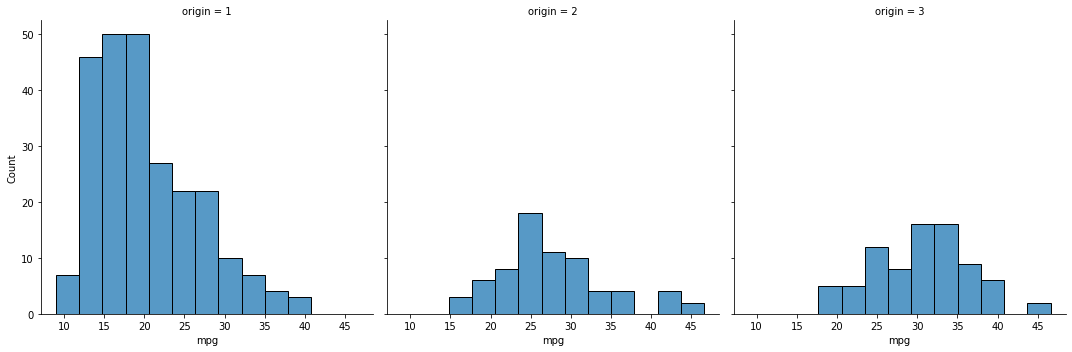

In [ ]:
# Use origin to split mpg into columns
# Plot histograms here
sns.displot(x='mpg', col='origin', data=df);

We can display the counts in the same plot, one on top of the other.

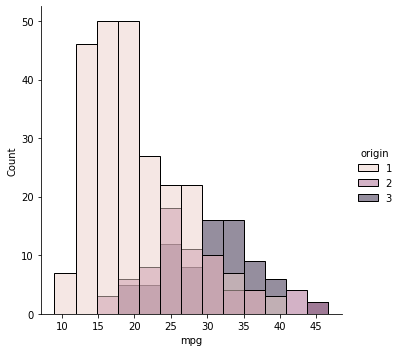

In [ ]:
# Use origin to color (hue) in the same plot
# Plot histograms in one plot
sns.displot(x='mpg', hue='origin', data=df);

To have an idea of the split between different origins, we can stack the counts, adding up to total.

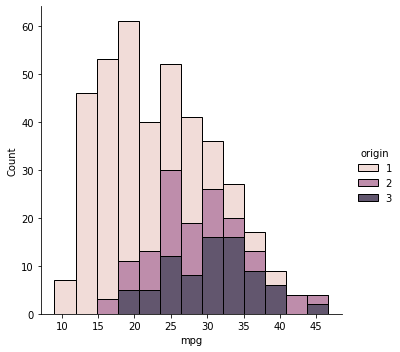

In [ ]:
# Plot new histogram here
sns.displot(x='mpg', hue='origin', data=df, multiple='stack');

We can look at the differences in ages with a boxplot too

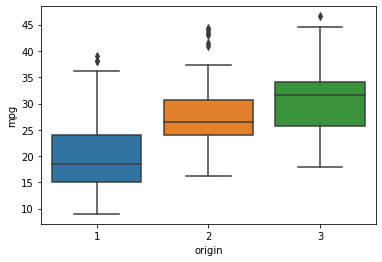

In [ ]:
# Plot boxplot here
sns.boxplot(x='origin', y='mpg', data=df);

Let's re-create the scatter plot to see if mpg and weight are correlated by origin.

To make the legend show strings we will create a origin string column.

In [ ]:
# Create origin string column
df['origin_str'] = df['origin'].replace([1,2,3], ['origin_1', 'origin_2','origin_3'])

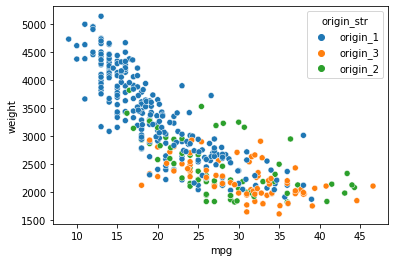

In [ ]:
# Plot scatter plot
ax = sns.scatterplot(x='mpg', y='weight', data=df, hue='origin_str')

Adding a regression line helps with visualizing the relationship

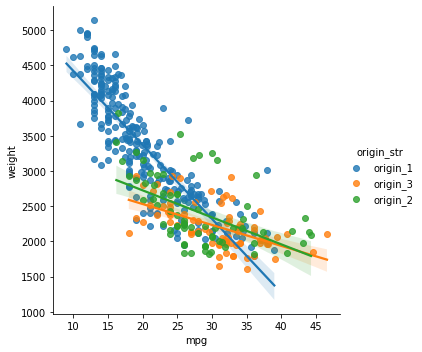

In [ ]:
# Add a regression line
ax = sns.lmplot(x='mpg', y='weight', data=df, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

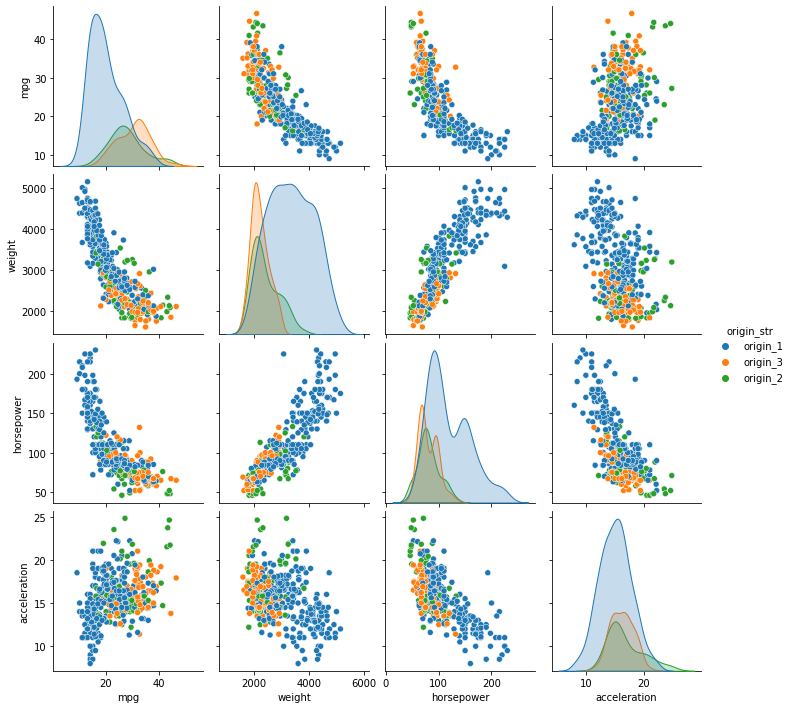

In [ ]:
# Use pairplot function
sns.pairplot(df, vars=['mpg', 'weight', 'horsepower', 'acceleration'], hue='origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

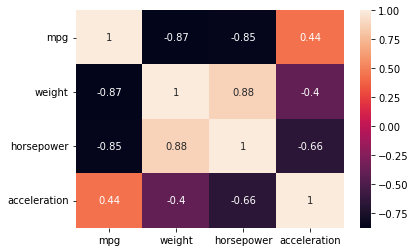

In [ ]:
# Plot heatmap
g = sns.heatmap(df[['mpg','weight', 'horsepower', 'acceleration' ]].corr(method='spearman'), 
            annot=True)

If you need any help, check out the tutorials on the Seaborn website